In this project, I will create a model to predict whether an employee will leave the company using data from 14,999 employees in the dataset. Various methods will be employed to build this model.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

I define the libraries necessary for cleaning, transforming, visualizing the data, and building the machine learning model.

In [2]:
df = pd.read_csv("HR_capstone_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Load the dataset and display the first 5 rows.

satisfaction_level: Indicates the employee's satisfaction level.

last_evaluation: The employee's last evaluation score.

number_project: Number of projects the employee is working on.

average_montly_hours: Average monthly hours worked by the employee.

time_spend_company: Number of years the employee has spent at the company.

Work_accident: Indicates if the employee has had a work accident.

left: Whether the employee has left the company.

promotion_last_5years: Whether the employee was promoted in the last five years.

Department: The department the employee belongs to.

salary: The employee's salary category.

In [3]:
df.shape

(14999, 10)

Use the shape attribute to observe the number of records and features in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


This provides detailed information about the dataset:

The dataset contains 14,999 records indexed from 0 to 14,998.
There are 10 features in the dataset.
Each column name and the number of non-null values in each column are listed. All columns have 14,999 non-null values, indicating no missing values.
Data types for columns are as follows:
float64: satisfaction_level, last_evaluation
int64: number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years
object: Department, salary
Memory usage is approximately 1.1 MB.

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


left:

mean: 0.238

min and max: 0 ve 1.



In [6]:
#Aykırı değer tespiti
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

outlier_detection = {}
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for feature in features:
    outlier_detection[feature] = detect_outliers(df, feature)

for feature in features:
    print(f"{feature}: {outlier_detection[feature].shape[0]} outlier")

satisfaction_level: 0 outlier
last_evaluation: 0 outlier
number_project: 0 outlier
average_montly_hours: 0 outlier
time_spend_company: 1282 outlier


In [7]:
cleaned_df = df.drop(outlier_detection['time_spend_company'].index)
print(cleaned_df.shape)

(13717, 10)


Remove rows containing identified outliers from the dataset and then observe the new dimensions of the cleaned dataset.

In [8]:
#data transformation
categorical_features = ['Department', 'salary']
encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = encoder.fit_transform(cleaned_df[categorical_features])
categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_features))

cleaned_df = pd.concat([cleaned_df.drop(categorical_features, axis=1), categorical_encoded], axis=1)
print(cleaned_df.head().T)
print(cleaned_df.shape)

                             0       2       3       4       5
satisfaction_level        0.38    0.11    0.72    0.37    0.41
last_evaluation           0.53    0.88    0.87    0.52    0.50
number_project            2.00    7.00    5.00    2.00    2.00
average_montly_hours    157.00  272.00  223.00  159.00  153.00
time_spend_company        3.00    4.00    5.00    3.00    3.00
Work_accident             0.00    0.00    0.00    0.00    0.00
left                      1.00    1.00    1.00    1.00    1.00
promotion_last_5years     0.00    0.00    0.00    0.00    0.00
Department_IT             0.00    0.00    0.00    0.00    0.00
Department_RandD          0.00    0.00    0.00    0.00    0.00
Department_accounting     0.00    0.00    0.00    0.00    0.00
Department_hr             0.00    0.00    0.00    0.00    0.00
Department_management     0.00    0.00    0.00    0.00    0.00
Department_marketing      0.00    0.00    0.00    0.00    0.00
Department_product_mng    0.00    0.00    0.00    0.00 

Convert the categorical features 'Department' and 'salary' into numerical form using one-hot encoding. This transformation creates a separate column for each categorical value. After the conversion, observe the new dimensions of the dataset.

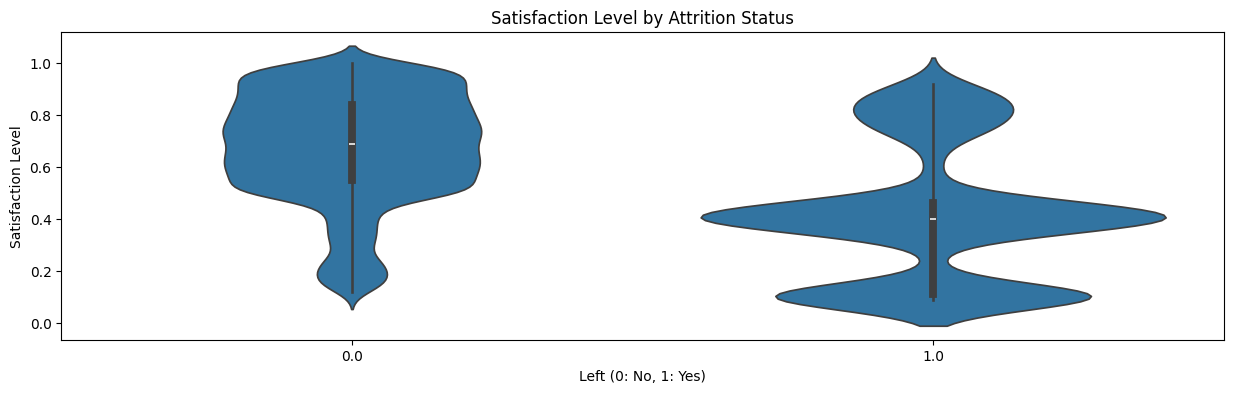

In [9]:
#data visualization
plt.figure(figsize=(15, 4))
sns.violinplot(x=cleaned_df['left'], y=cleaned_df['satisfaction_level'])
plt.title('Satisfaction Level by Attrition Status')
plt.xlabel('Left (0: No, 1: Yes)')
plt.ylabel('Satisfaction Level')
plt.show()

When we look at the graph, we observe that employees who did not leave generally have high satisfaction levels. Among those who left, satisfaction levels are concentrated at both extremes, with some very high and some very low.

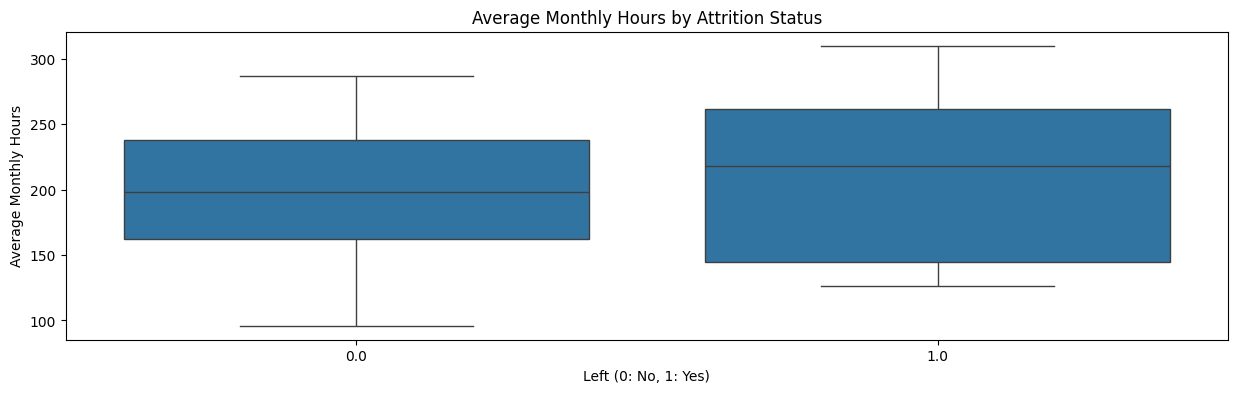

In [10]:
#data visualization
plt.figure(figsize=(15, 4))
sns.boxplot(x='left', y='average_montly_hours', data=cleaned_df)
plt.title('Average Monthly Hours by Attrition Status')
plt.xlabel('Left (0: No, 1: Yes)')
plt.ylabel('Average Monthly Hours')
plt.show()

For employees who did not leave, the working hours are generally lower and within a narrower range. For employees who left, the average monthly working hours are generally higher, with a wider range on both the lower and upper ends.

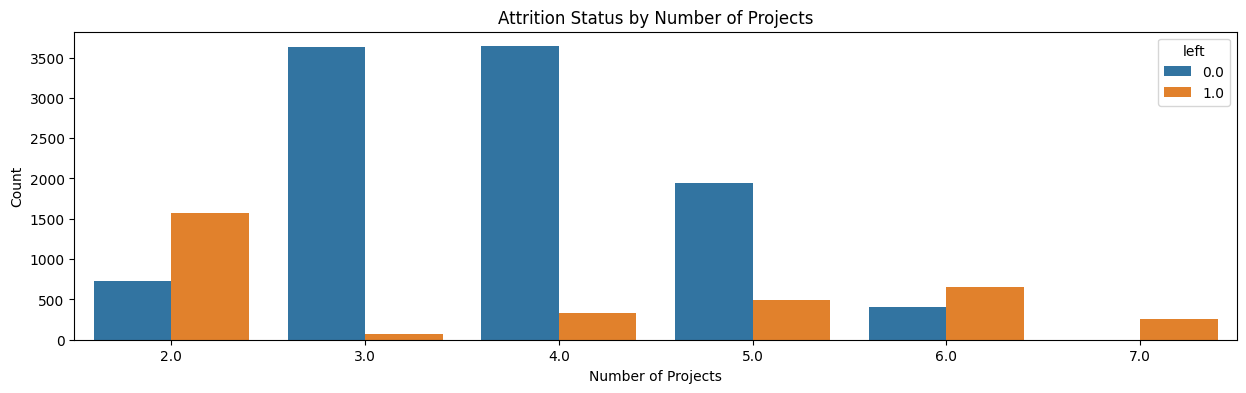

In [11]:
#data visualization
plt.figure(figsize=(15, 4))
sns.countplot(x='number_project', hue='left', data=cleaned_df)
plt.title('Attrition Status by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.show()

2 Projects: Low project count may indicate insufficient engagement or motivation for employees.

3 Projects: The number of employees who did not leave is significantly higher than those who did, suggesting this is a suitable workload.

4 Projects: Most employees in this category did not leave, indicating this project count is also appropriate.

5 Projects: More employees left than stayed, potentially due to increased workload and stress.

6 and 7 Projects: Few employees fall into these categories, and the attrition rate is relatively high, indicating they might be overwhelmed by the high project load.

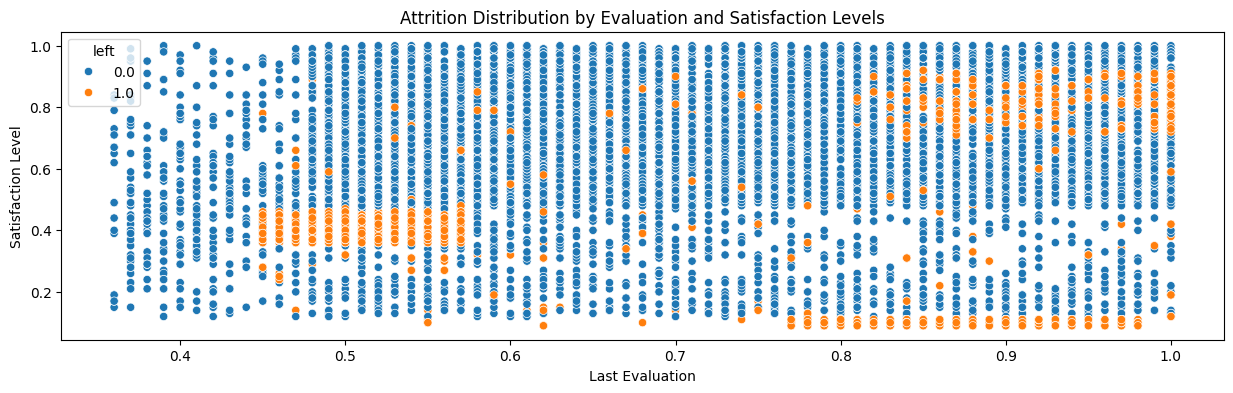

In [12]:
#data visualization
plt.figure(figsize=(15, 4))
sns.scatterplot(x='last_evaluation', y='satisfaction_level', hue='left', data=cleaned_df)
plt.title('Attrition Distribution by Evaluation and Satisfaction Levels')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')
plt.show()

High Evaluation and High Satisfaction: Mostly blue points, indicating employees with high evaluation and high satisfaction levels generally did not leave.

Low Satisfaction and Variable Evaluation Levels: Employees with low satisfaction (0.2 and below) show varied evaluation levels, with a higher attrition rate.

Medium Satisfaction and High Evaluation: Employees with medium satisfaction and high evaluation show both attrition and retention, suggesting other factors may influence attrition decisions.

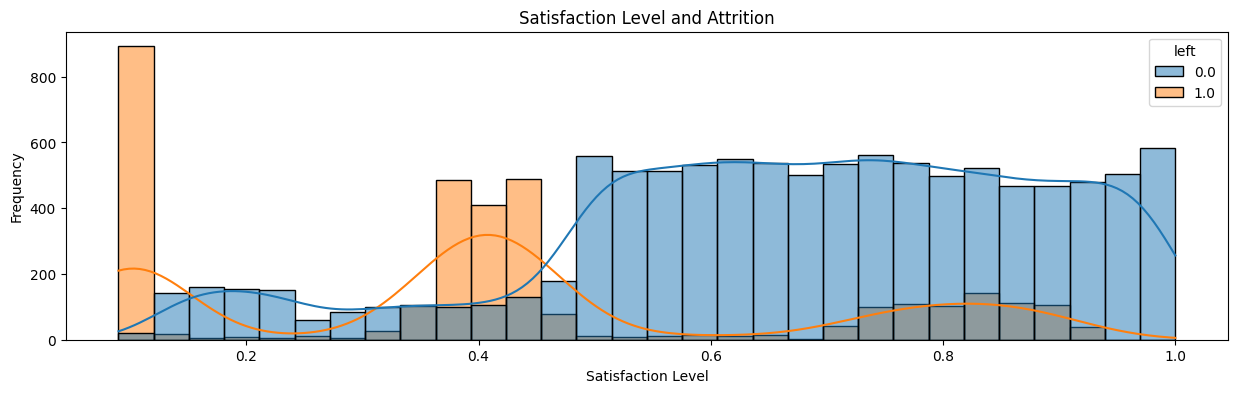

In [13]:
#data visualization
plt.figure(figsize=(15, 4))
sns.histplot(x='satisfaction_level', hue='left', data=cleaned_df, kde=True)
plt.title('Satisfaction Level and Attrition')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

Very Low Satisfaction (0.0 - 0.2): The number of employees who left is significantly higher than those who stayed, indicating low satisfaction may lead to attrition.

Medium Satisfaction (0.3 - 0.5): Balanced distribution with fewer overall leavers.

High Satisfaction (0.6 - 1.0): As satisfaction increases, the number of employees leaving decreases, especially between 0.7 and 1.0, where very few employees left.

In [14]:
#New features to improve model performance
cleaned_df['high_work_hours'] = (cleaned_df['average_montly_hours'] > 220).astype(int)
cleaned_df['performance_score'] = cleaned_df['satisfaction_level'] * cleaned_df['last_evaluation']
cleaned_df['work_load'] = cleaned_df['number_project'] / cleaned_df['average_montly_hours']
cleaned_df['satisfaction_evaluation_diff'] = cleaned_df['last_evaluation'] - cleaned_df['satisfaction_level']
cleaned_df['accident_hour_ratio'] = cleaned_df['Work_accident'] / cleaned_df['average_montly_hours']
cleaned_df['satisfaction_project_interaction'] = cleaned_df['satisfaction_level'] * cleaned_df['number_project']
cleaned_df['project_evaluation'] = cleaned_df['number_project'] * cleaned_df['last_evaluation']
cleaned_df['hours_per_project'] = cleaned_df['average_montly_hours'] / cleaned_df['number_project']
cleaned_df['time_since_last_evaluation'] = cleaned_df['time_spend_company'] - cleaned_df['last_evaluation']
cleaned_df['satisfaction_hours'] = cleaned_df['satisfaction_level'] * cleaned_df['average_montly_hours']
cleaned_df['evaluation_hours'] = cleaned_df['last_evaluation'] * cleaned_df['average_montly_hours']
cleaned_df['work_accident_projects'] = cleaned_df['Work_accident'] * cleaned_df['number_project']
cleaned_df['satisfaction_time_spent'] = cleaned_df['satisfaction_level'] * cleaned_df['time_spend_company']
cleaned_df['evaluation_time_spent'] = cleaned_df['last_evaluation'] * cleaned_df['time_spend_company']
cleaned_df['projects_time_spent'] = cleaned_df['number_project'] * cleaned_df['time_spend_company']
cleaned_df['average_hours_per_year'] = cleaned_df['average_montly_hours'] * 12
cleaned_df['project_satisfaction'] = cleaned_df['number_project'] * cleaned_df['satisfaction_level']
cleaned_df['project_evaluation_diff'] = cleaned_df['number_project'] * cleaned_df['satisfaction_evaluation_diff']
cleaned_df['company_avg_satisfaction'] = cleaned_df.groupby('time_spend_company')['satisfaction_level'].transform('mean')
cleaned_df['company_avg_evaluation'] = cleaned_df.groupby('time_spend_company')['last_evaluation'].transform('mean')
cleaned_df['relative_satisfaction'] = cleaned_df['satisfaction_level'] / cleaned_df['company_avg_satisfaction']
cleaned_df['relative_evaluation'] = cleaned_df['last_evaluation'] / cleaned_df['company_avg_evaluation']
cleaned_df['interaction_1'] = cleaned_df['satisfaction_level'] * cleaned_df['time_spend_company'] * cleaned_df['average_montly_hours']
cleaned_df['interaction_2'] = cleaned_df['last_evaluation'] * cleaned_df['number_project'] * cleaned_df['time_spend_company']

print(cleaned_df.head().T)
print(cleaned_df.shape)

                                            0            2            3  \
satisfaction_level                   0.380000     0.110000     0.720000   
last_evaluation                      0.530000     0.880000     0.870000   
number_project                       2.000000     7.000000     5.000000   
average_montly_hours               157.000000   272.000000   223.000000   
time_spend_company                   3.000000     4.000000     5.000000   
Work_accident                        0.000000     0.000000     0.000000   
left                                 1.000000     1.000000     1.000000   
promotion_last_5years                0.000000     0.000000     0.000000   
Department_IT                        0.000000     0.000000     0.000000   
Department_RandD                     0.000000     0.000000     0.000000   
Department_accounting                0.000000     0.000000     0.000000   
Department_hr                        0.000000     0.000000     0.000000   
Department_management    

create new features using the existing columns to enrich the dataset and improve the model's performance by combining existing information in different ways.

high_work_hours: Identifies employees working more than 220 hours monthly, indicating high workload.

performance_score: Product of satisfaction level and last evaluation score, measuring overall performance.

work_load: Ratio of the number of projects to monthly work hours, indicating work intensity.

satisfaction_evaluation_diff: Difference between last evaluation score and satisfaction level, indicating performance-satisfaction mismatch.

accident_hour_ratio: Ratio of work accidents to monthly work hours, indicating safety issues.

satisfaction_project_interaction: Product of satisfaction level and the number of projects, showing engagement.

project_evaluation: Product of the number of projects and last evaluation score, indicating workload-performance relationship.

hours_per_project: Average hours spent per project, indicating project workload.

time_since_last_evaluation: Difference between company tenure and last evaluation score, showing evaluation timing.

satisfaction_hours: Product of satisfaction level and monthly work hours, showing satisfaction-work hours interaction.

evaluation_hours: Product of last evaluation score and monthly work hours, showing performance-work hours interaction.

work_accident_projects: Product of work accidents and the number of projects, indicating accident-project relationship.

satisfaction_time_spent: Product of satisfaction level and company tenure, indicating satisfaction-tenure relationship.

evaluation_time_spent: Product of last evaluation score and company tenure, indicating performance-tenure relationship.

projects_time_spent: Product of the number of projects and company tenure, indicating total project effort.

average_hours_per_year: Annual total work hours.

project_satisfaction: Product of the number of projects and satisfaction level, indicating project satisfaction.

project_evaluation_diff: Product of the number of projects and the difference between satisfaction and last evaluation scores.

company_avg_satisfaction: Average satisfaction level for the same tenure period.

company_avg_evaluation: Average evaluation score for the same tenure period.

relative_satisfaction: Satisfaction level relative to the company's average satisfaction.

relative_evaluation: Evaluation score relative to the company's average evaluation.

interaction_1: Complex interaction of satisfaction level, tenure, and monthly work hours.

interaction_2: Complex interaction of last evaluation score, number of projects, and tenure.

In [15]:
cleaned_df.isnull().sum()

satisfaction_level                  1018
last_evaluation                     1018
number_project                      1018
average_montly_hours                1018
time_spend_company                  1018
Work_accident                       1018
left                                1018
promotion_last_5years               1018
Department_IT                       1018
Department_RandD                    1018
Department_accounting               1018
Department_hr                       1018
Department_management               1018
Department_marketing                1018
Department_product_mng              1018
Department_sales                    1018
Department_support                  1018
Department_technical                1018
salary_high                         1018
salary_low                          1018
salary_medium                       1018
high_work_hours                        0
performance_score                   1018
work_load                           1018
satisfaction_eva

In [16]:
imputer = SimpleImputer(strategy='mean')
cleaned_df = pd.DataFrame(imputer.fit_transform(cleaned_df), columns=cleaned_df.columns)
print(cleaned_df.isnull().sum())

satisfaction_level                  0
last_evaluation                     0
number_project                      0
average_montly_hours                0
time_spend_company                  0
Work_accident                       0
left                                0
promotion_last_5years               0
Department_IT                       0
Department_RandD                    0
Department_accounting               0
Department_hr                       0
Department_management               0
Department_marketing                0
Department_product_mng              0
Department_sales                    0
Department_support                  0
Department_technical                0
salary_high                         0
salary_low                          0
salary_medium                       0
high_work_hours                     0
performance_score                   0
work_load                           0
satisfaction_evaluation_diff        0
accident_hour_ratio                 0
satisfaction

It uses SimpleImputer to fill all missing values in the cleaned_df DataFrame with the mean of the respective columns.

In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14735 entries, 0 to 14734
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   satisfaction_level                14735 non-null  float64
 1   last_evaluation                   14735 non-null  float64
 2   number_project                    14735 non-null  float64
 3   average_montly_hours              14735 non-null  float64
 4   time_spend_company                14735 non-null  float64
 5   Work_accident                     14735 non-null  float64
 6   left                              14735 non-null  float64
 7   promotion_last_5years             14735 non-null  float64
 8   Department_IT                     14735 non-null  float64
 9   Department_RandD                  14735 non-null  float64
 10  Department_accounting             14735 non-null  float64
 11  Department_hr                     14735 non-null  float64
 12  Depa

In [18]:
cleaned_df['left'] = cleaned_df['left'].astype(int)

X = cleaned_df.drop('left', axis=1)
y = cleaned_df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)

Accuracy: 95.38513742789277
Precision: 90.24745269286754
Recall: 89.98548621190132
F1 Score: 90.11627906976743


Data Type Conversion:
cleaned_df['left'] = cleaned_df['left'].astype(int): Converts the 'left' column to integers to avoid errors when left as float64.

Feature and Target Separation:
X = cleaned_df.drop('left', axis=1): Creates a DataFrame X containing features, excluding the 'left' column.
y = cleaned_df['left']: Isolates the target variable 'left' as a series y, defining our dependent and independent variables.

Data Splitting:
train_test_split(X, y, test_size=0.2, random_state=42): Splits the dataset into 80% training and 20% testing sets. The random_state parameter ensures reproducibility.

Model Creation and Training:
LogisticRegression(max_iter=10000, solver='lbfgs'): Creates a logistic regression model with increased iterations for better performance on complex datasets. model.fit(X_train, y_train): Trains the model with the training data.

Prediction and Performance Evaluation:
y_pred = model.predict(X_test): Makes predictions using the test set. Performance metrics (accuracy, precision, recall, F1 score) are calculated to evaluate the model:

Accuracy: Measures the proportion of correct predictions.
Precision: Measures how many of the predicted positives are actually positive.
Recall: Measures how many of the actual positives are correctly predicted.
F1 Score: Harmonic mean of precision and recall, providing a balanced performance measure.

In [19]:
data = pd.DataFrame({
    'satisfaction_level': [0.5],
    'last_evaluation': [0.6],
    'number_project': [4],
    'average_montly_hours': [200],
    'time_spend_company': [3],
    'Work_accident': [0],
    'promotion_last_5years': [0],
    'Department_IT': [1],
    'Department_RandD': [0],
    'Department_accounting': [0],
    'Department_hr': [0],
    'Department_management': [0],
    'Department_marketing': [0],
    'Department_product_mng': [0],
    'Department_sales': [0],
    'Department_support': [0],
    'Department_technical': [0],
    'salary_high': [0],
    'salary_low': [1],
    'salary_medium': [0],
    'high_work_hours': [0],
    'performance_score': [0.3],
    'work_load': [0.02],
    'satisfaction_evaluation_diff': [0.1],
    'accident_hour_ratio': [0],
    'satisfaction_project_interaction': [2.0],
    'project_evaluation': [400],
    'hours_per_project': [200],
    'time_since_last_evaluation': [0],
    'satisfaction_hours': [0.3],
    'evaluation_hours': [0.6],
    'work_accident_projects': [0],
    'satisfaction_time_spent': [0.3],
    'evaluation_time_spent': [0.6],
    'projects_time_spent': [400],
    'average_hours_per_year': [2400],
    'project_satisfaction': [400],
    'project_evaluation_diff': [400],
    'company_avg_satisfaction': [0.5],
    'company_avg_evaluation': [0.6],
    'relative_satisfaction': [0.5],
    'relative_evaluation': [0.6],
    'interaction_1': [0.5],
    'interaction_2': [0.6]
})

predicted_attrition = model.predict(data)
print("Predicted Attrition (0=No, 1=Yes):", predicted_attrition)

Predicted Attrition (0=No, 1=Yes): [0]


This employee has moderate levels of satisfaction and performance. Their working hours and project load indicate that the workload is not overly exhausting. Additionally, there is a noticeable difference between their satisfaction and performance levels.

**Youtube** **Video** **Link** :  https://www.youtube.com/watch?v=i_SSbkYIbmY&t=3s  (The video in the link is in Turkish.)